# Linear Tree

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lineartree import LinearTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from joblib import dump
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/superconductivity.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/superconductivity.parquet')

In [3]:
y_train = train.critical_temp
X_train = train.drop(columns=['critical_temp'])

In [4]:
y_validation = validation.critical_temp
X_validation = validation.drop(columns=['critical_temp'])

In [7]:
scaler = StandardScaler().fit(X_train)

In [8]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [24]:
models_list = [LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=i) for i in range(1, 3)] + [LinearTreeRegressor(base_estimator=Ridge(), max_depth=i) for i in range(1, 6)] + [LinearTreeRegressor(base_estimator=Lasso(), max_depth=i) for i in range(1, 3)] + [LinearTreeRegressor(base_estimator=ElasticNet(l1_ratio=0.25), max_depth=i) for i in range(1, 3)] + [LinearTreeRegressor(base_estimator=ElasticNet(), max_depth=i) for i in range(1, 3)] + [LinearTreeRegressor(base_estimator=ElasticNet(l1_ratio=0.75), max_depth=i) for i in range(1, 3)]

In [27]:
names_list = ['LT_'+str(i) for i in range(1, 3)] + ['LT_'+str(i)+'_l2' for i in range(1, 6)] + ['LT_'+str(i)+'_l1' for i in range(1, 3)]+ ['LT_'+str(i)+'_en_0.25' for i in range(1, 3)] + ['LT_'+str(i)+'_en_0.5' for i in range(1, 3)] + ['LT_'+str(i)+'_en_0.75' for i in range(1, 3)]

In [29]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/superconductivity/linear_tree.csv', X_train_scaled, y_train, X_validation_scaled, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
LT_1,381.397660,13.712102,96.586263,604.386990
LT_2,478.867812,12.142220,139.747654,1050.923437
LT_1_l2,116.001498,13.823866,89.250878,545.628939
LT_2_l2,139.786728,12.481349,110.848588,788.113839
LT_3_l2,142.758122,11.318727,31.905902,181.885963
LT_4_l2,142.107534,11.286436,31.885837,182.514672
LT_5_l2,142.189165,11.286436,31.885837,182.514672
LT_1_l1,362.362497,16.717115,17.088435,2.221198
LT_2_l1,392.024599,15.321909,16.303668,6.407550
LT_1_en_0.25,1133.977720,17.060389,19.232263,12.730509


In [30]:
metrics.sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
LT_2_l1,392.024599,15.321909,16.303668,6.407550
LT_1_l1,362.362497,16.717115,17.088435,2.221198
LT_1_en_0.5,777.875486,17.057315,18.027326,5.686773
LT_2_en_0.5,800.040159,15.617705,18.088202,15.818565
LT_2_en_0.75,526.385312,15.591981,18.249008,17.040984
LT_2_en_0.25,1162.450424,15.606829,18.694911,19.786734
LT_1_en_0.25,1133.977720,17.060389,19.232263,12.730509
LT_4_l2,142.107534,11.286436,31.885837,182.514672
LT_5_l2,142.189165,11.286436,31.885837,182.514672
LT_3_l2,142.758122,11.318727,31.905902,181.885963


We are left with **LT_2_l1**

In [5]:
test =  pd.read_parquet('../../../data/model_input/test_sets/superconductivity.parquet')

In [6]:
y_test = test.critical_temp
X_test = test.drop(columns=['critical_temp'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.critical_temp
X_retrain = retrain.drop(columns=['critical_temp'])

In [9]:
scaler_retrain = StandardScaler().fit(X_retrain)

In [10]:
X_retrain_scaled = scaler_retrain.transform(X_retrain)
X_test_scaled = scaler_retrain.transform(X_test)

In [37]:
model = LinearTreeRegressor(base_estimator=Lasso(), max_depth=2).fit(X_retrain_scaled, y_retrain)

In [38]:
test_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 16.6735


In [39]:
dump(model, '../../../data/model_output/models/superconductivity/best_linear_tree.joblib')

['best_linear_tree.joblib']

In [40]:
with open('../../../data/model_output/metrics/superconductivity/final_RMSE.txt', 'a') as f:
    f.write('\nLT, '+ str(rmse))

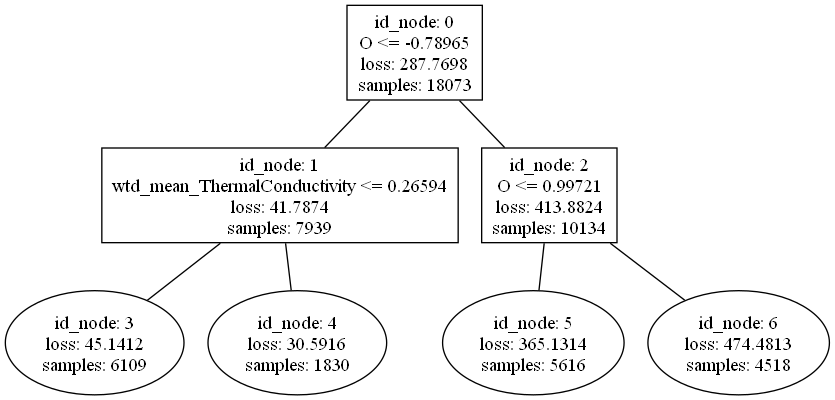

In [41]:
model.plot_model(feature_names=X_retrain.columns)

We are going to plot each leaf separately because we have too many features


In [45]:
leaves = model.summary(only_leaves=True)

In [49]:
top_threshold3 = 0
top_coefficients3 = [coef for coef in leaves[3]['models'].coef_.ravel() if abs(coef) > top_threshold3]
top_features3 = [name for name, coef in zip(X_retrain.columns, leaves[3]['models'].coef_.ravel()) if abs(coef) > top_threshold3]

In [50]:
labels3 = [' ' if feature not in top_features3 else feature for feature in X_retrain.columns]

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_14492/3203925617.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels3, rotation=90, ha='right')


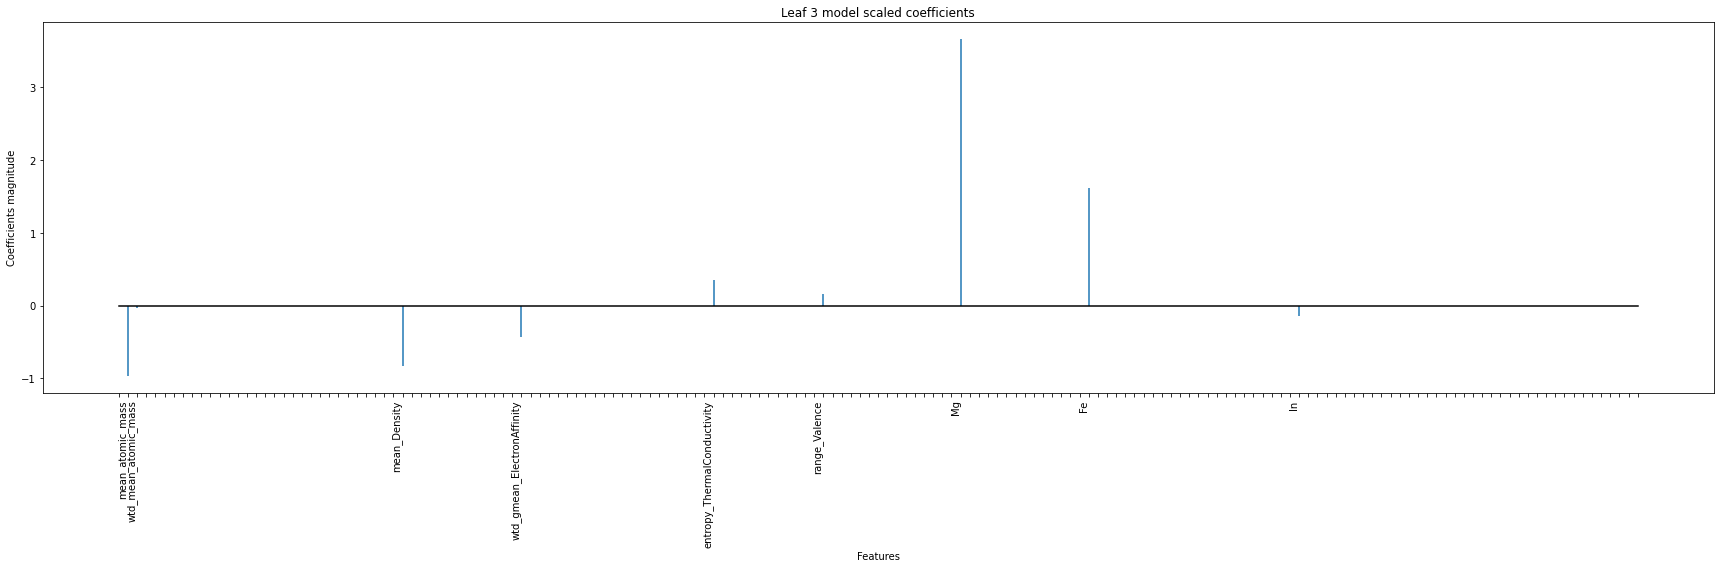

In [51]:
fig, ax = plt.subplots(figsize=(24, 8))
ax.stem(X_retrain.columns, leaves[3]['models'].coef_.ravel(), markerfmt=' ', basefmt='k-')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients magnitude')
ax.set_title('Leaf 3 model scaled coefficients')
ax.set_xticklabels(labels3, rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [52]:
top_threshold4 = 0
top_coefficients4 = [coef for coef in leaves[4]['models'].coef_.ravel() if abs(coef) > top_threshold4]
top_features4 = [name for name, coef in zip(X_retrain.columns, leaves[4]['models'].coef_.ravel()) if abs(coef) > top_threshold4]

In [53]:
labels4 = [' ' if feature not in top_features4 else feature for feature in X_retrain.columns]

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_14492/2312693884.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels4, rotation=90, ha='right')


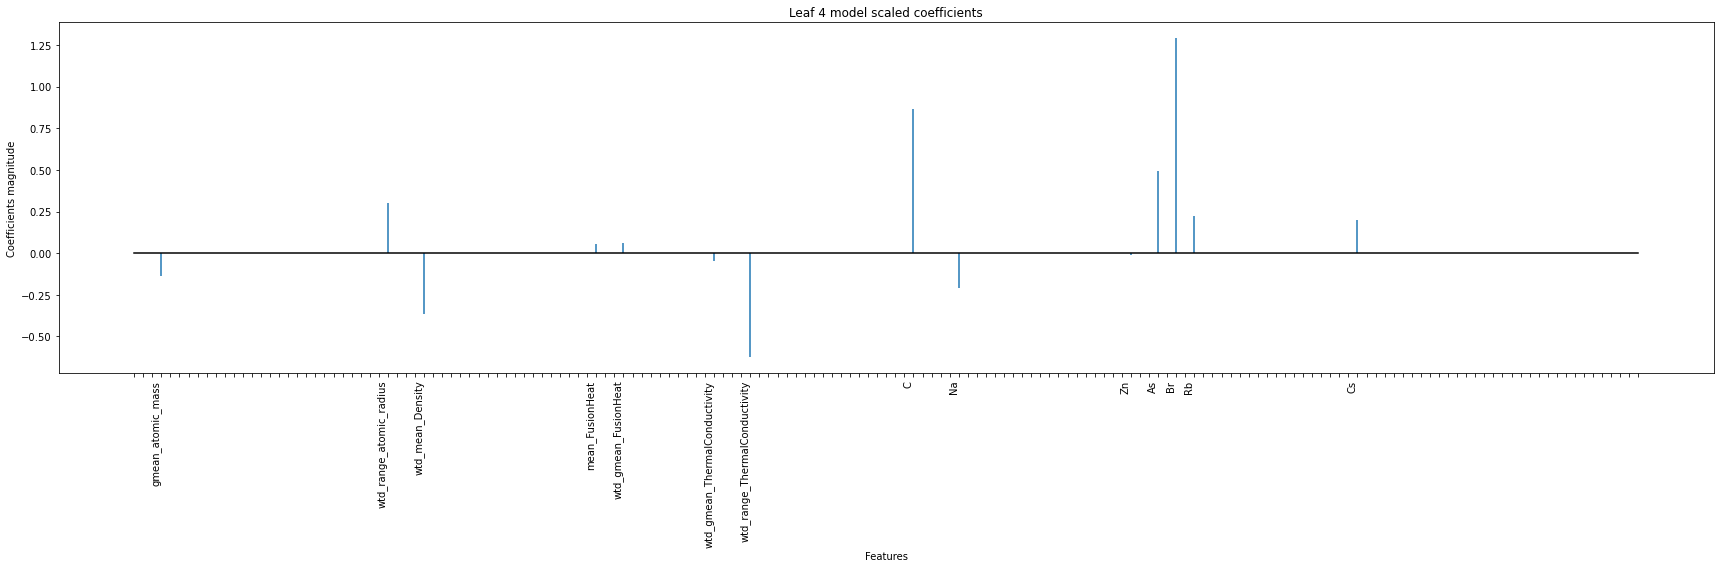

In [54]:
fig, ax = plt.subplots(figsize=(24, 8))
ax.stem(X_retrain.columns, leaves[4]['models'].coef_.ravel(), markerfmt=' ', basefmt='k-')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients magnitude')
ax.set_title('Leaf 4 model scaled coefficients')
ax.set_xticklabels(labels4, rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [55]:
top_threshold5 = 0
top_coefficients5 = [coef for coef in leaves[5]['models'].coef_.ravel() if abs(coef) > top_threshold5]
top_features5 = [name for name, coef in zip(X_retrain.columns, leaves[5]['models'].coef_.ravel()) if abs(coef) > top_threshold5]

In [56]:
labels5 = [' ' if feature not in top_features5 else feature for feature in X_retrain.columns]

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_14492/2637617358.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels5, rotation=90, ha='right')


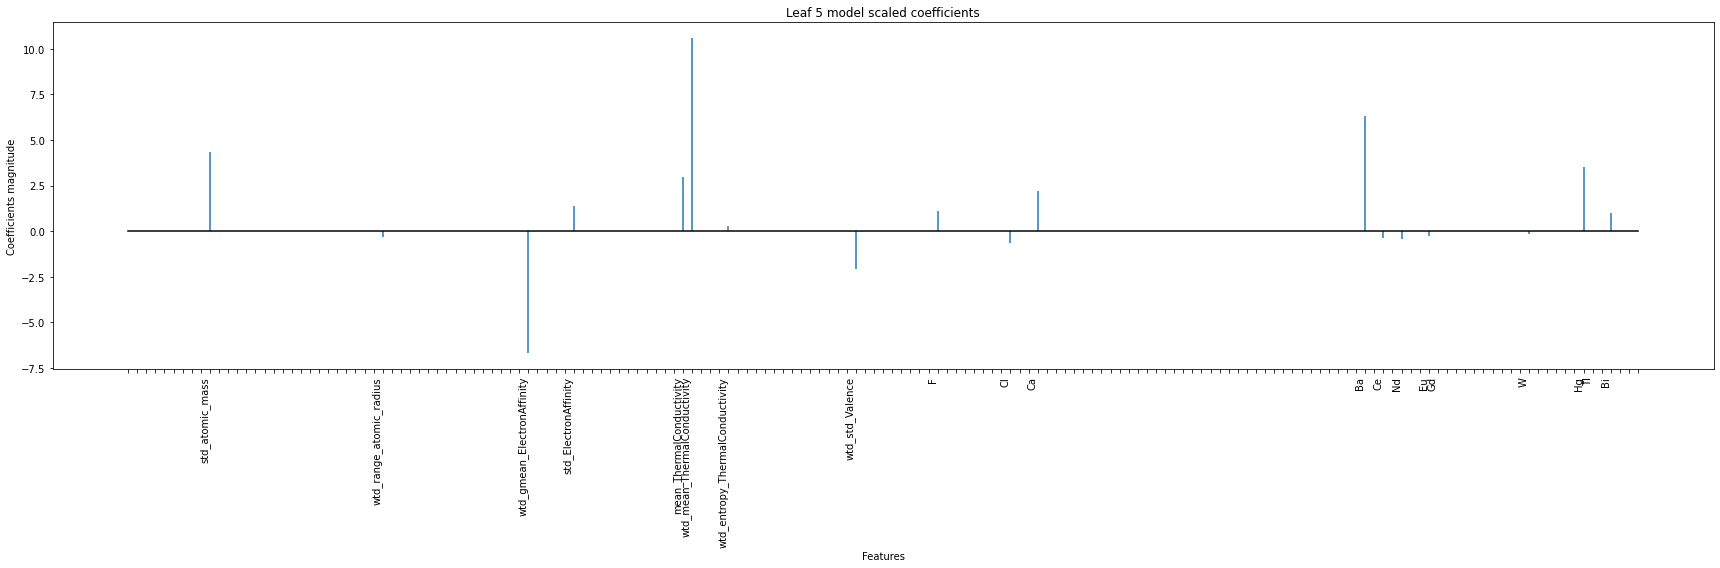

In [57]:
fig, ax = plt.subplots(figsize=(24, 8))
ax.stem(X_retrain.columns, leaves[5]['models'].coef_.ravel(), markerfmt=' ', basefmt='k-')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients magnitude')
ax.set_title('Leaf 5 model scaled coefficients')
ax.set_xticklabels(labels5, rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [11]:
from joblib import load
load_mod = load('../../../data/model_output/models/superconductivity/best_linear_tree.joblib')

train_pred = load_mod.predict(X_retrain_scaled)
rmse_train = root_mean_squared_error(y_retrain, train_pred)
test_pred = load_mod.predict(X_test_scaled)
rmse_test = root_mean_squared_error(y_test, test_pred)

In [12]:
import time 
time1 = time.time()
LinearTreeRegressor(base_estimator=Lasso(), max_depth=2).fit(X_retrain_scaled, y_retrain)
time2 = time.time() - time1 

with open('../../../data/model_output/metrics/superconductivity/final_metrics.txt', 'a') as f:
     f.write(f'\nLT; {time2}; {rmse_train}; {rmse_test}')